# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Churn Data

In [5]:
def normalize(col):
    return (col - np.mean(col)) / np.std(col)

def load_data(filename):
    df = pd.read_csv(filename)

    # Drop the state and phone columns
    del df['State']
    del df['Area Code']
    del df['Phone']

    # Binarize remaining variables
    df["Int'l Plan"] = (df["Int\'l Plan"] == 'yes').astype(int)
    df["VMail Plan"] = (df["VMail Plan"] == 'yes').astype(int)
    df['Churn?'] = (df['Churn?'] == 'True.').astype(int)

    # Normalize columns so that cosine similarity is the same as correlation
    arr = np.apply_along_axis(normalize, 1, df.values)
    return arr, df.columns

arr, cols = load_data('churn.csv')

In [7]:
arr.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

## Perform hierarchical clustering on observations (columns)

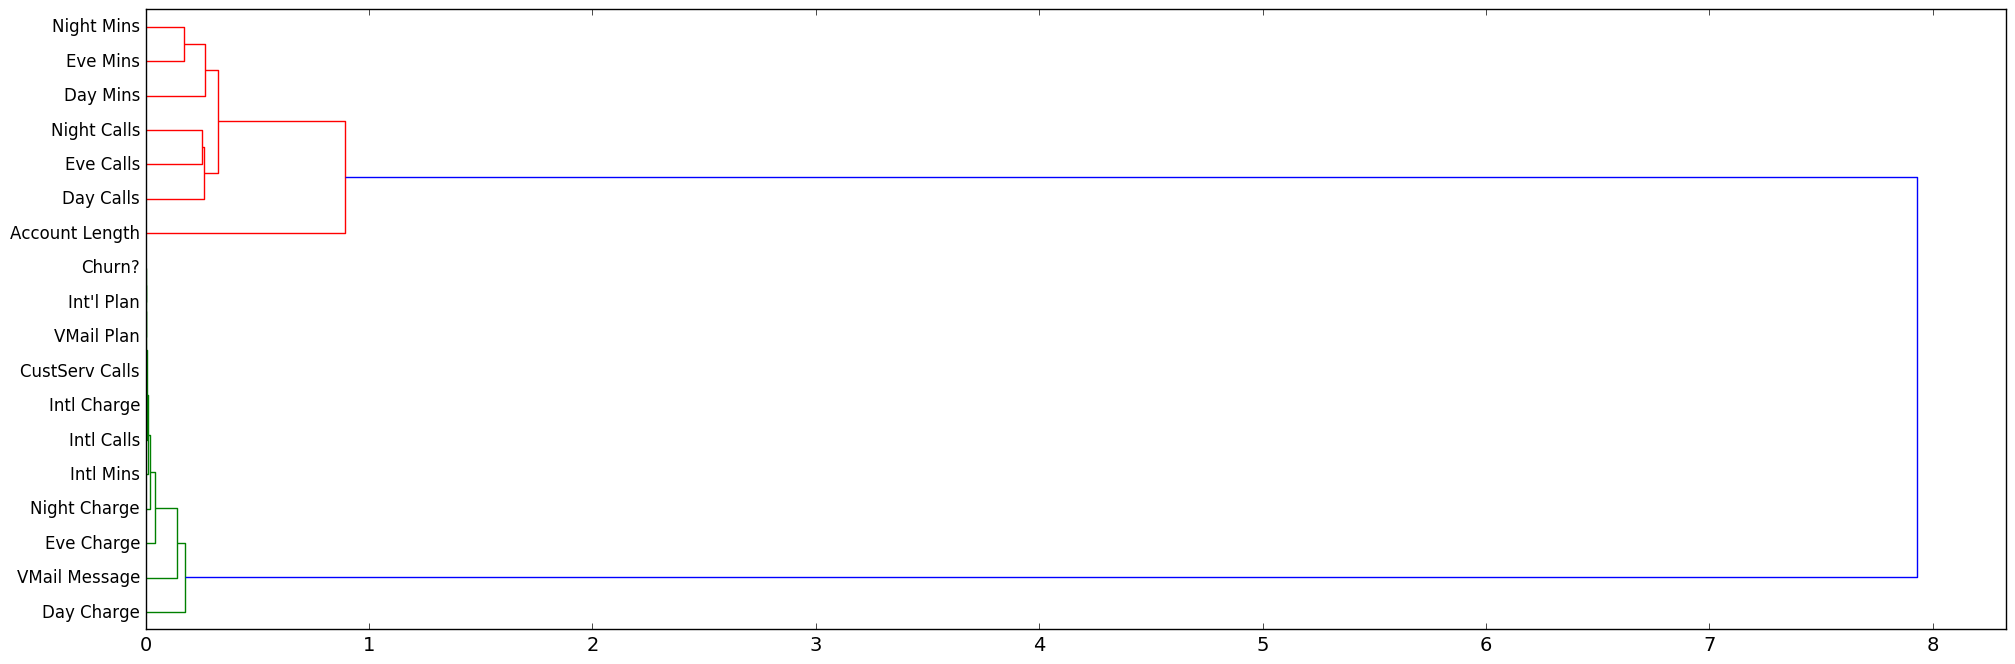

In [3]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Create distance matrix on columns using cosine distance
dist = squareform(pdist(arr.transpose(), 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(24,8))
_ = dendrogram(clust, ax=ax, labels=cols, orientation='right')
_ = plt.xticks(fontsize=14)